In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv(r"C:\Users\ASUS\Documents\college_details\avocado.csv")


In [56]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [57]:
data.shape

(18249, 14)

In [58]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [59]:
data = data.drop(columns = ['Unnamed: 0','Date','type','year','region'])

In [60]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [61]:
# We will be building an regression model.

In [62]:
# lets check for outliers if there are any.

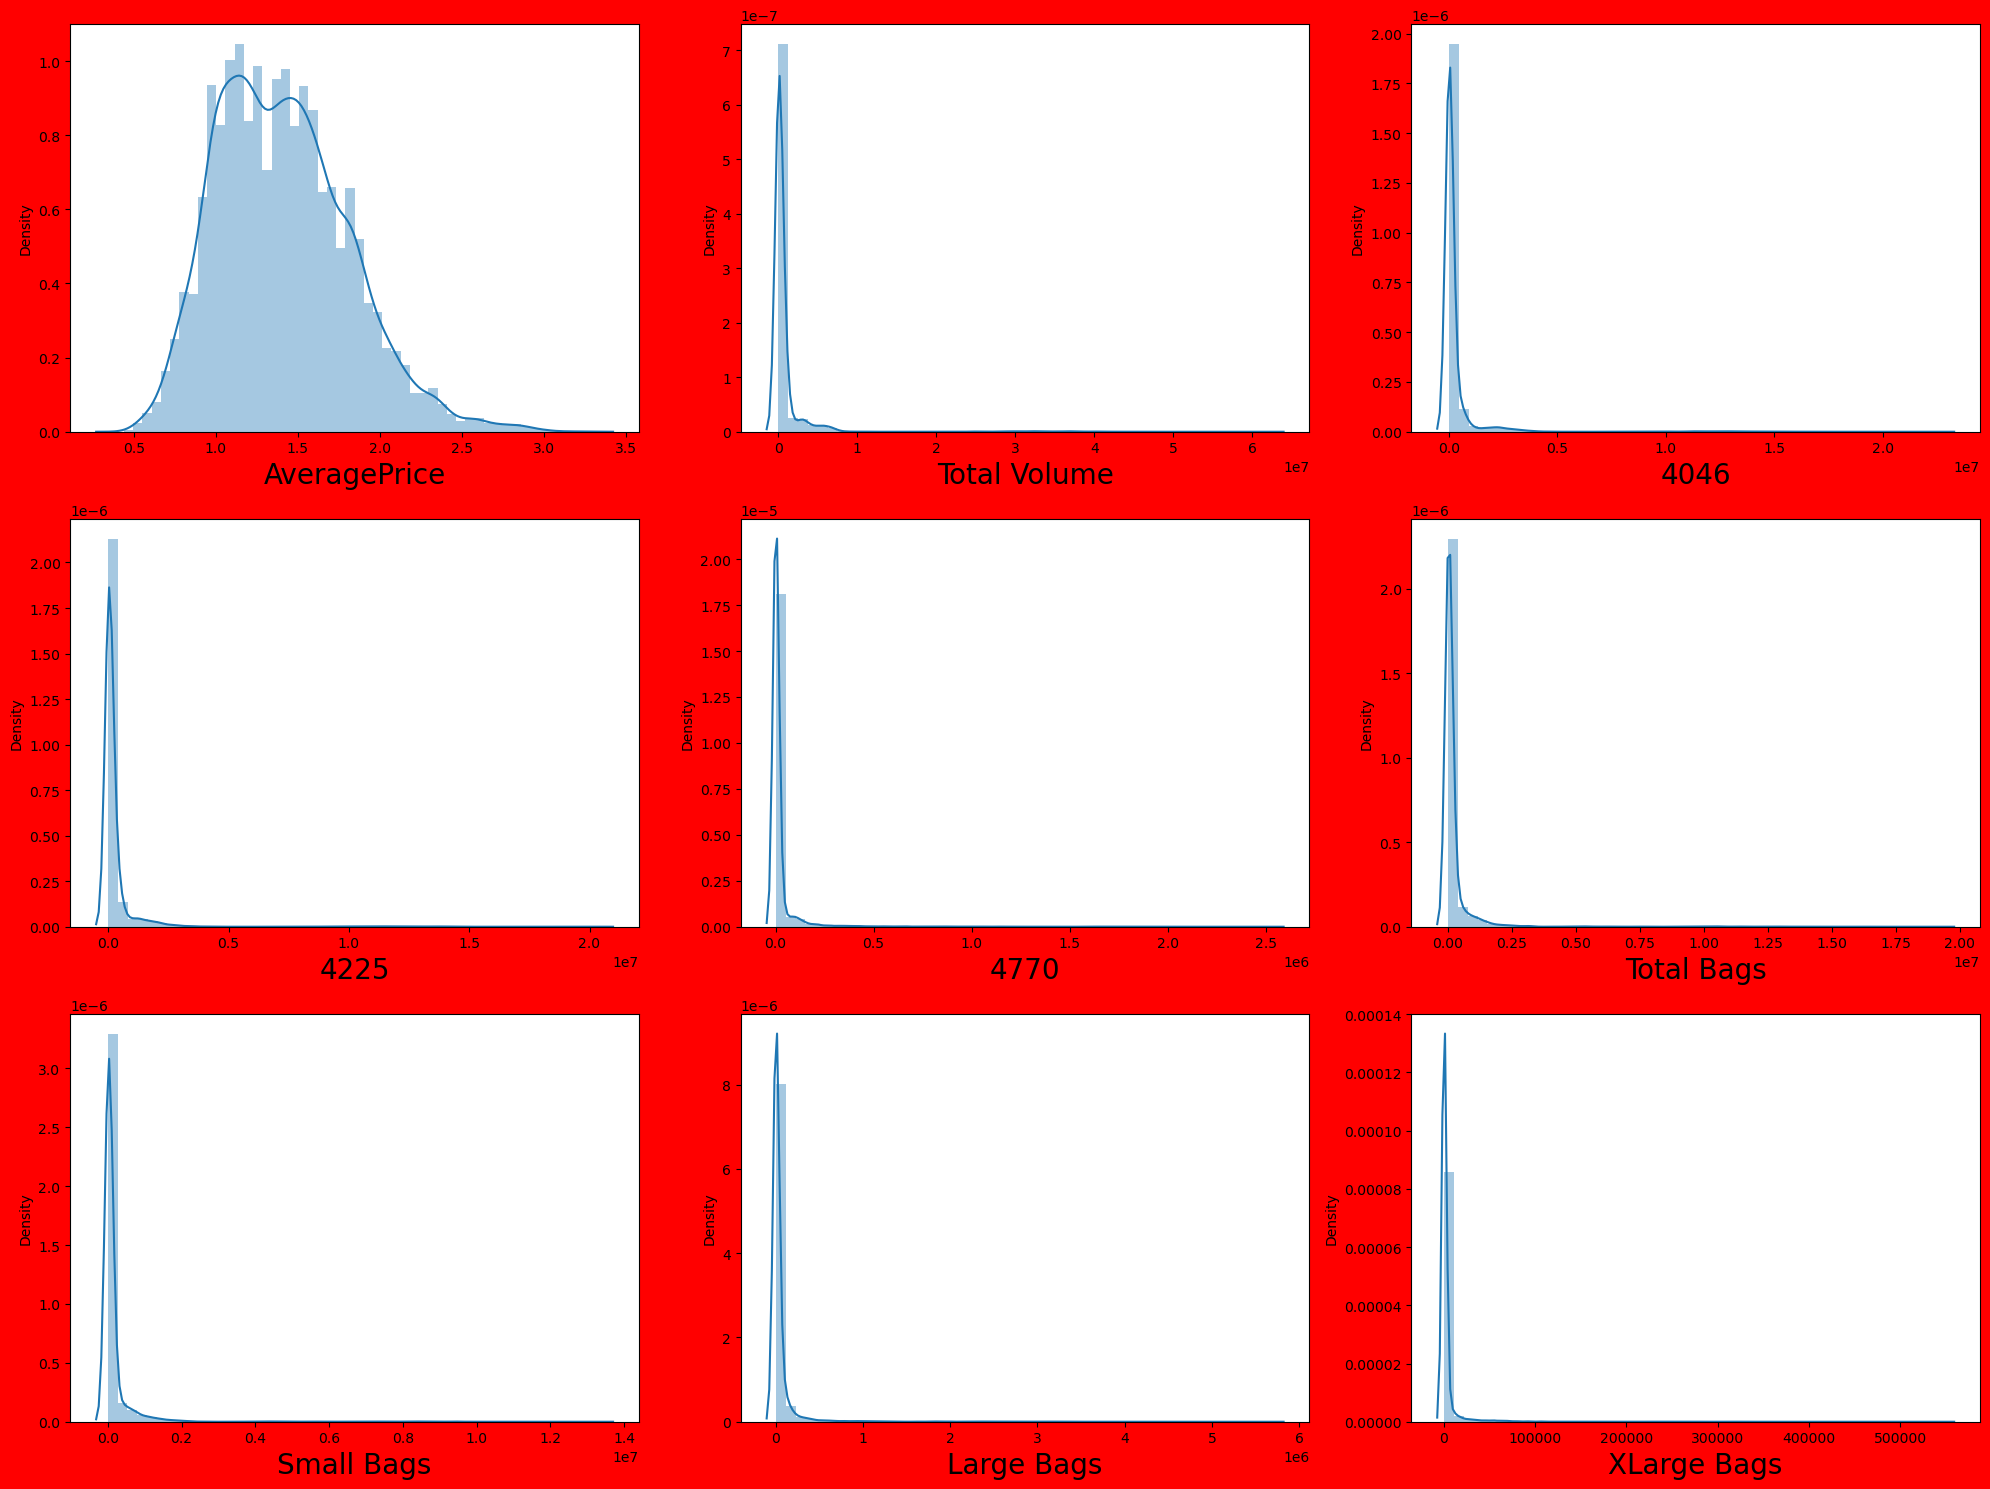

In [63]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [64]:
# Lots of skewedness can be found.

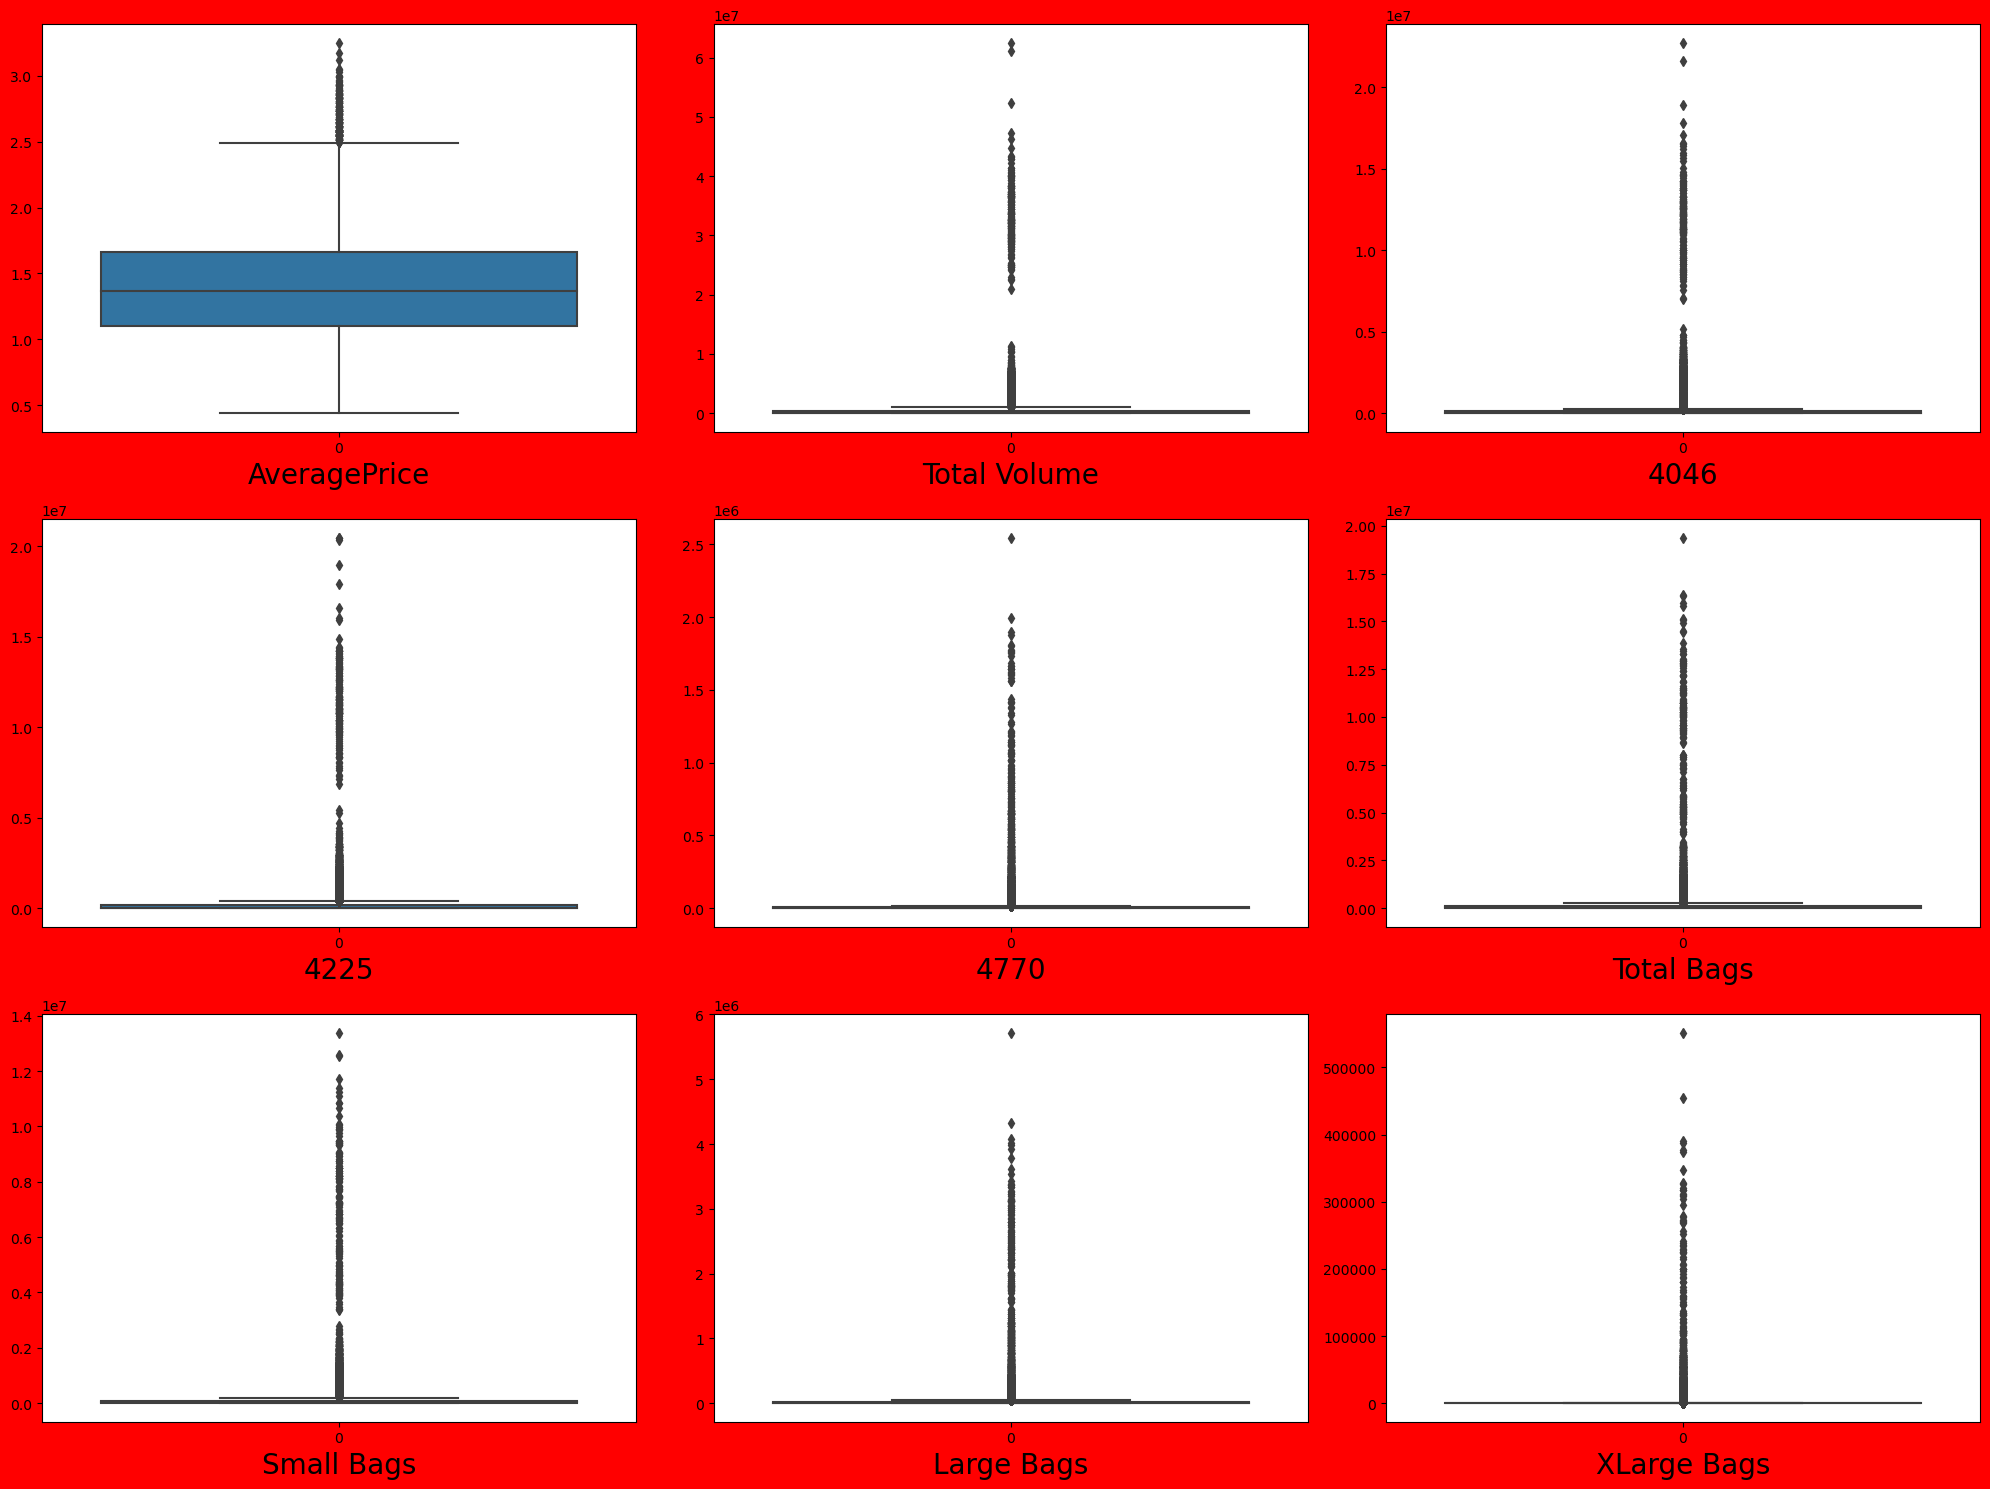

In [65]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [66]:
# We will be tresting those ouliers wiyhout loosing data.

In [67]:
def find_boundaries(df, variables):
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 -1.5* IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry , upper_boundry

In [68]:
lower_volume, upper_volume = find_boundaries(data,'Total Volume')
print('upper limit for volume is', upper_volume)
print('lower limit for volume is', lower_volume)

upper limit for volume is 1066147.855
lower limit for volume is -622346.985


In [69]:
data['Total Volume'] = np.where(data['Total Volume'] > upper_volume,upper_volume,
                    np.where(data['Total Volume'] < lower_volume, lower_volume , data['Total Volume']))


In [70]:
# Treating 4046.

In [71]:
lower_4046, upper_4046 = find_boundaries(data,'4046')
print('upper limit for 4046 is', upper_4046)
print('lower limit for 4046 is', lower_4046)

upper limit for 4046 is 276269.39499999996
lower limit for 4046 is -164395.12499999997


In [72]:
data['4046'] = np.where(data['4046'] > upper_4046,upper_4046,
                    np.where(data['4046'] < lower_4046, lower_4046 , data['4046']))


In [73]:
# Treating 4225.

In [74]:
lower_4225, upper_4225 = find_boundaries(data,'4225')
print('upper limit for 4225 is', upper_4225)
print('lower limit for 4225 is', lower_4225)

upper limit for 4225 is 371003.98
lower limit for 4225 is -217788.34


In [75]:
data['4225'] = np.where(data['4225'] > upper_4225,upper_4225,
                    np.where(data['4225'] < lower_4225, lower_4225 , data['4225']))


In [76]:
# Treating 4770.

In [77]:
lower_4770, upper_4770 = find_boundaries(data,'4770')
print('upper limit for 4770 is', upper_4770)
print('lower limit for 4770 is', lower_4770)

upper limit for 4770 is 15608.550000000001
lower limit for 4770 is -9365.130000000001


In [78]:
data['4770'] = np.where(data['4770'] > upper_4770,upper_4770,
                    np.where(data['4770'] < lower_4770, lower_4770 , data['4770']))


In [79]:
# Treating Total Bags.

In [80]:
lower_bags, upper_bags = find_boundaries(data,'Total Bags')
print('upper limit for Total Bags is', upper_bags)
print('lower limit for Total Bags is', lower_bags)

upper limit for Total Bags is 269325.46499999997
lower limit for Total Bags is -153453.455


In [81]:
data['Total Bags'] = np.where(data['Total Bags'] > upper_bags,upper_bags,
                    np.where(data['Total Bags'] < lower_bags, lower_bags , data['Total Bags']))


In [82]:
# Treating Small Bags.

In [83]:
lower_small, upper_small = find_boundaries(data,'Small Bags')
print('upper limit for Small Bags is', upper_small)
print('lower limit for Small Bags is', lower_small)

upper limit for Small Bags is 204070.04499999998
lower limit for Small Bags is -117882.955


In [84]:
data['Small Bags'] = np.where(data['Small Bags'] > upper_small,upper_small,
                    np.where(data['Small Bags'] < lower_small, lower_small , data['Small Bags']))


In [85]:
# Treating Large Bags.

In [86]:
lower_lar, upper_lar = find_boundaries(data,'Large Bags')
print('upper limit for Large Bags is', upper_lar)
print('lower limit for Large Bags is', lower_lar)

upper limit for Large Bags is 54881.92
lower limit for Large Bags is -32725.199999999997


In [87]:
data['Large Bags'] = np.where(data['Large Bags'] > upper_lar,upper_lar,
                    np.where(data['Large Bags'] < lower_lar, lower_lar , data['Large Bags']))


In [88]:
# Treating XLarge Bags.

In [89]:
lower_xl, upper_xl = find_boundaries(data,'XLarge Bags')
print('upper limit for XLarge Bags is', upper_xl)
print('lower limit for XLarge Bags is', lower_xl)

upper limit for XLarge Bags is 331.25
lower limit for XLarge Bags is -198.75


In [90]:
data['XLarge Bags'] = np.where(data['XLarge Bags'] > upper_xl,upper_xl,
                    np.where(data['XLarge Bags'] < lower_xl, lower_xl , data['XLarge Bags']))


In [91]:
# Treating AveragePrice.

In [92]:
lower_av, upper_av = find_boundaries(data,'AveragePrice')
print('upper limit for AveragePrice is', upper_av)
print('lower limit for AveragePrice is', lower_av)

upper limit for AveragePrice is 2.4999999999999996
lower limit for AveragePrice is 0.26000000000000034


In [93]:
data['AveragePrice'] = np.where(data['AveragePrice'] > upper_av,upper_av,
                    np.where(data['AveragePrice'] < lower_av, lower_av , data['AveragePrice']))


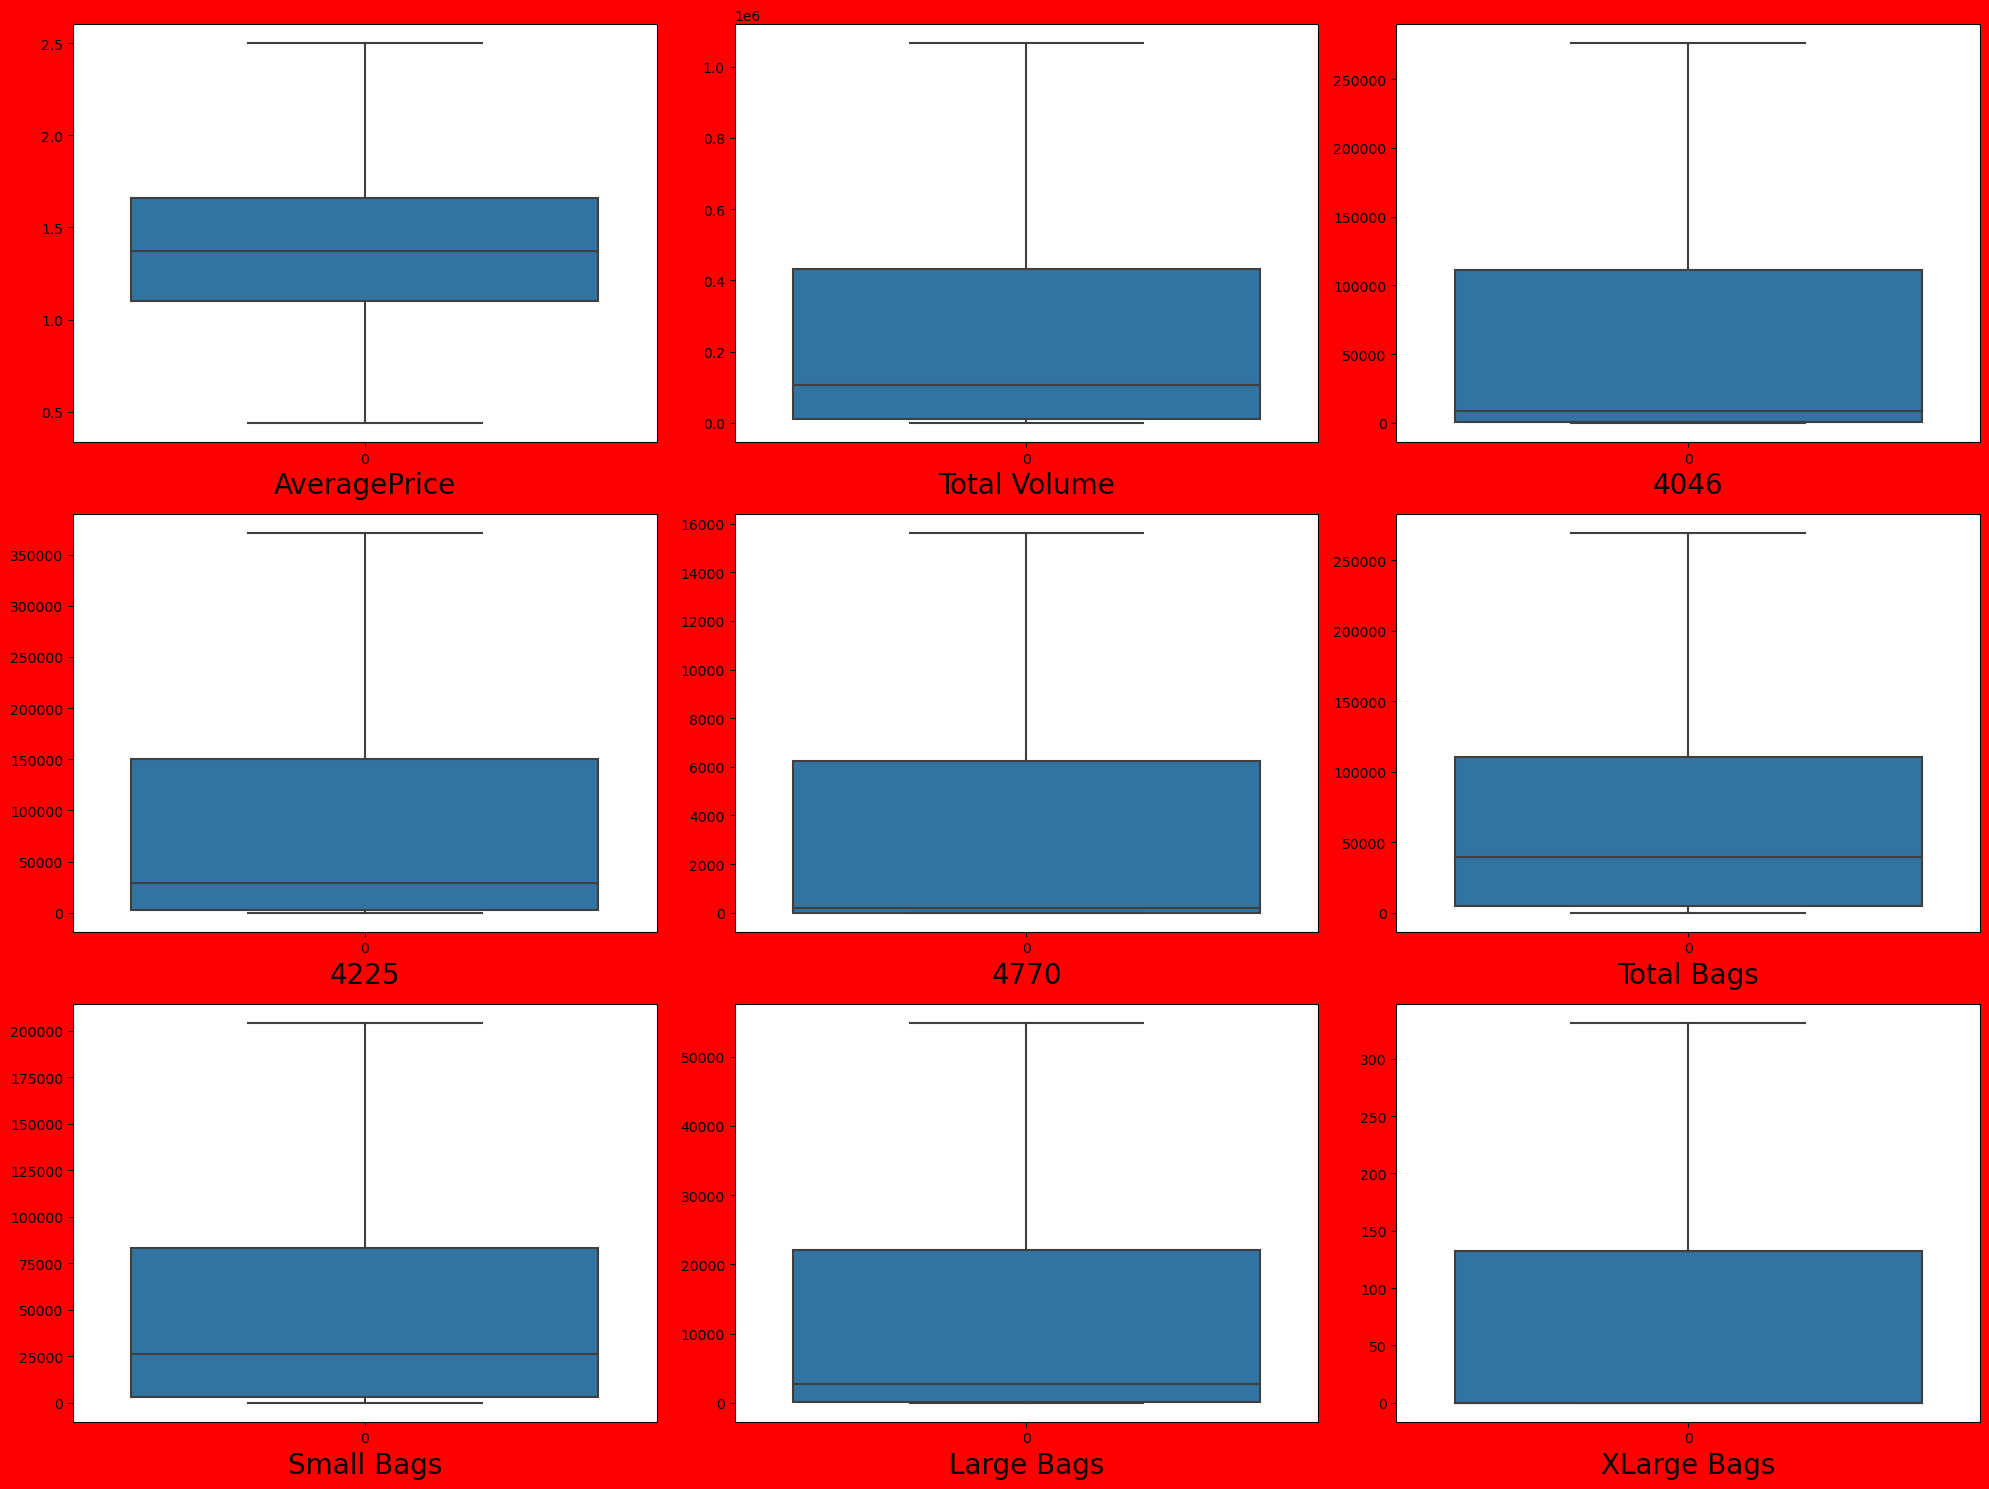

In [94]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [ ]:
# Divide data into feature and label.

In [95]:
y = data['AveragePrice']
x = data.drop(columns = ['AveragePrice'])

In [96]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [97]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [98]:
# Checking for relationship between x & y.

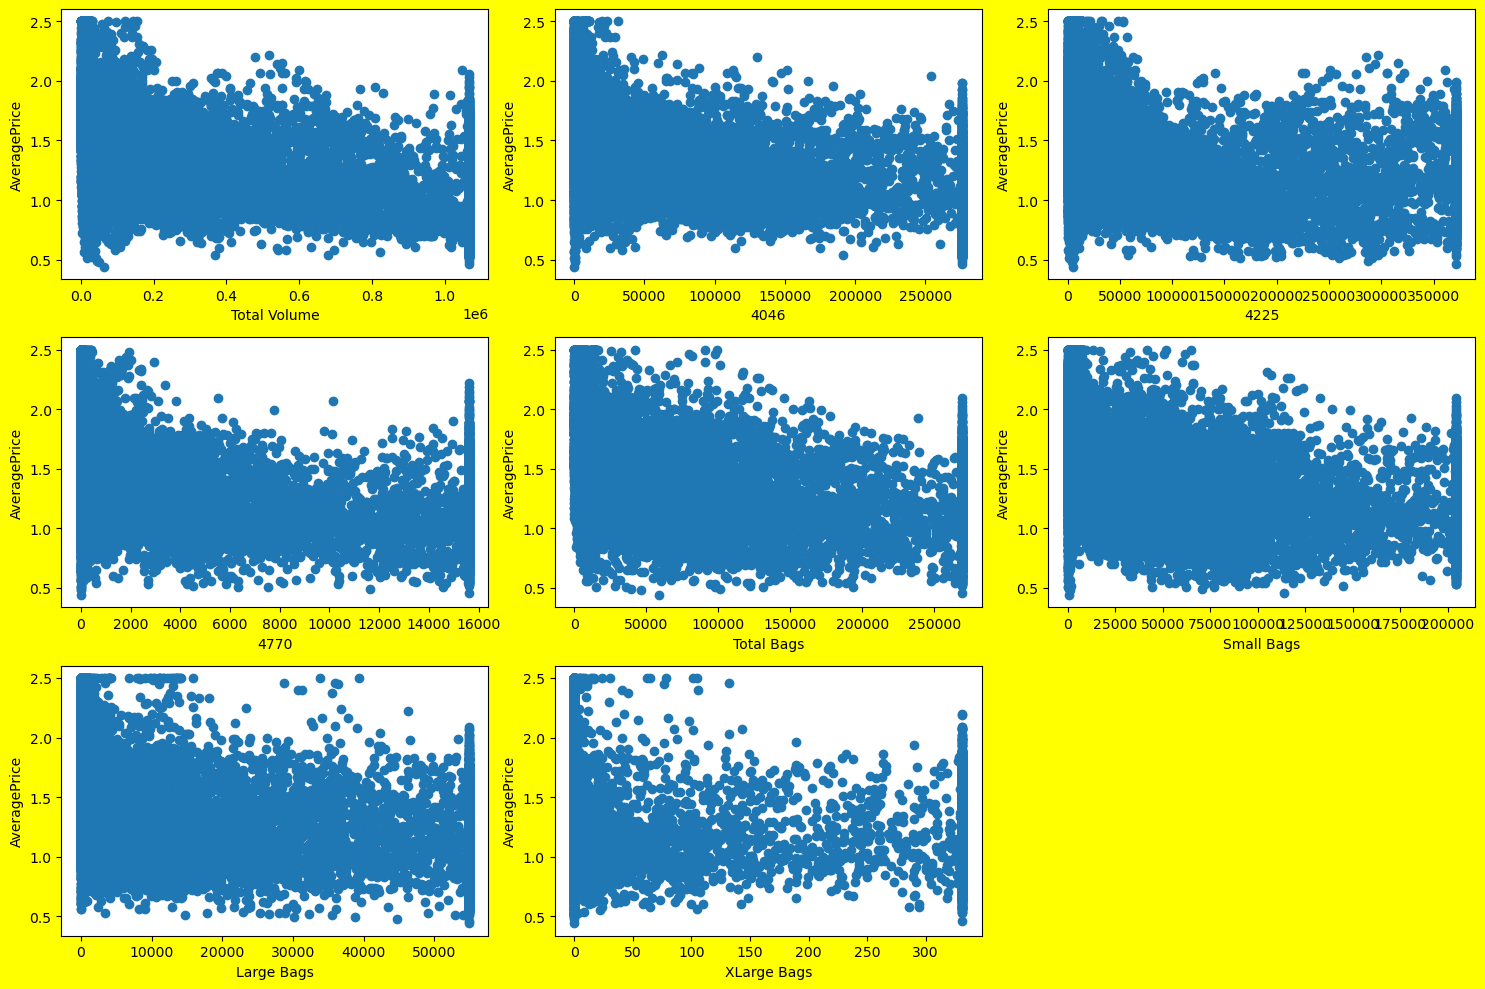

In [99]:
plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('AveragePrice',fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [100]:
# Data scaling.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-0.60712774, -0.69011448, -0.33244626, ..., -0.7011625 ,
        -0.70368522, -0.60051081],
       [-0.63241146, -0.69376675, -0.40617828, ..., -0.68962115,
        -0.70347556, -0.60051081],
       [-0.46129887, -0.69255336,  0.07838741, ..., -0.70921698,
        -0.70319618, -0.60051081],
       ...,
       [-0.74346476, -0.68855083, -0.72305358, ..., -0.69042845,
        -0.70620405, -0.60051081],
       [-0.73687762, -0.68516809, -0.71908569, ..., -0.66793627,
        -0.70582381, -0.60051081],
       [-0.7334081 , -0.6713923 , -0.72377963, ..., -0.6526052 ,
        -0.70701004, -0.60051081]])

In [101]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,39.038239,Total Volume
1,6.632650,4046
2,11.857615,4225
3,2.450699,4770
4,39.524382,Total Bags
5,24.716364,Small Bags
6,4.634492,Large Bags
7,1.750478,XLarge Bags


In [ ]:
# Now we will do train, test, split.

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [103]:
# Model building.

In [104]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [105]:
data.tail(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0


In [108]:
regression.predict(scaler.transform([[17489.58, 2894.77, 2356.13, 224.53, 12014.15, 11988.14, 26.01, 0.0]]))

array([1.56945947])

In [109]:
# How our model perform with test data 

In [110]:
regression.score(x_test,y_test)

0.32309510348664405

In [111]:
regression.score(x_train,y_train)

0.32353625805029895

In [112]:
y_pred = regression.predict(x_test)

In [113]:
y_pred

array([1.39467739, 1.56795356, 1.5570496 , ..., 1.00375234, 1.55860558,
       0.99437456])

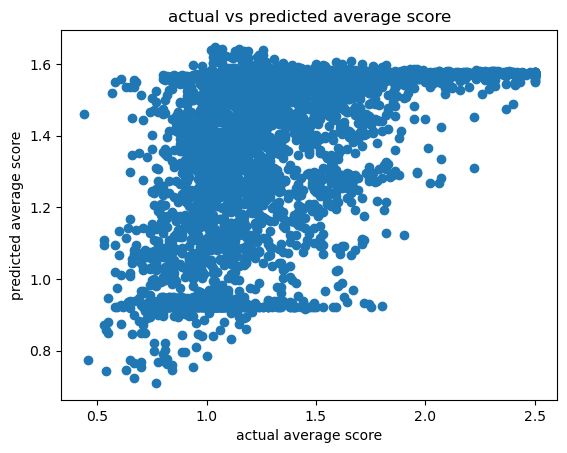

In [115]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual average score')
plt.ylabel('predicted average score')
plt.title('actual vs predicted average score')
plt.show()